# **DBSCAN**

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature. It is a partitional clustering method, which is composed of two main steps: 

1. **Core points identification**: A point is a core point if it has at least a minimum number of points (MinPts) within a radius ε (epsilon).
2. **Density-connected points expansion**: A point is density-connected to a core point if it is a core point or there is a chain of core points leading to that point.

The algorithm requires two parameters: ε and MinPts. The ε parameter is the maximum distance between two points for them to be considered as neighbors. The MinPts parameter is the minimum number of neighbors a point should have within the ε radius to be considered a core point.

The algorithm works as follows:

1. Randomly select a point P.
2. Retrieve all points density-reachable from P with respect to ε and MinPts.
3. If P is a core point, a cluster is formed.
4. If P is a border point, no points are density-reachable from P, then visit the next point.
5. Repeat the process until all points are processed.

# Advantages

1. DBSCAN does not require the number of clusters to be specified in advance.
2. DBSCAN can find arbitrarily shaped clusters.
3. DBSCAN can handle noise and outliers.

# Disadvantages

1. DBSCAN is sensitive to the parameters ε and MinPts.
2. DBSCAN does not work well when the clusters have different densities.
3. DBSCAN does not work well when the clusters have different sizes.

# Applications

1. Image segmentation.
2. Anomaly detection.
3. Clustering spatial data.
4. Identifying fraud detection.
5. Identifying cancer cells.


**In Summary** DBSCAN is a powerful clustering algorithm that can find arbitrarily shaped clusters and handle noise and outliers. It is a partitional clustering method that requires two parameters: ε and MinPts. The algorithm works by identifying core points and expanding density-connected points. \
DBSCAN is sensitive to the parameters ε and MinPts and does not work well when the clusters have different densities or sizes. It is commonly used in image segmentation, anomaly detection, clustering spatial data, identifying fraud detection, and identifying cancer cells.

In [2]:
# important libraries for DBSCAN
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

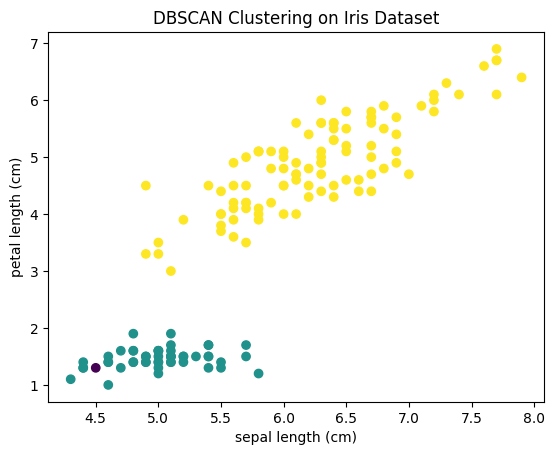

In [3]:
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the DBSCAN model
dbscan = DBSCAN(eps=1.2, min_samples=5)

# Fit the model
dbscan.fit(X_scaled)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()

## **Hyperparameters for DBSCAN**

A `K-4 distance plot`, also known as a K-distance graph, is used to determine the optimal values for the MinPts and ε parameters. The K-distance graph is a plot of the distance to the kth nearest neighbor for each point in the dataset. The optimal values for MinPts and ε can be determined by examining the K-distance graph and looking for the "knee" point, which is the point where the distance starts to increase rapidly.

In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns

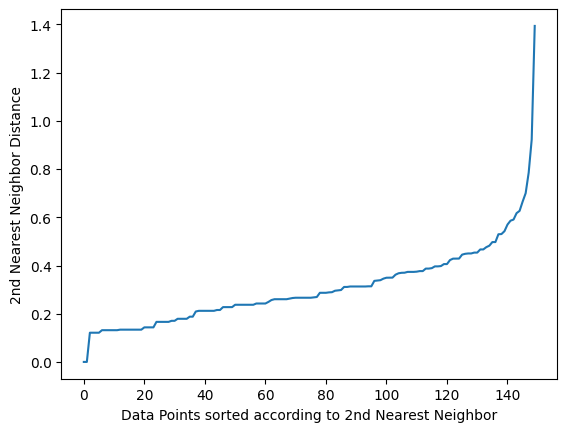

In [5]:
df = sns.load_dataset('iris')

features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)

# Get the distances and indices of the points
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort the distances and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points sorted according to 2nd Nearest Neighbor')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.show()

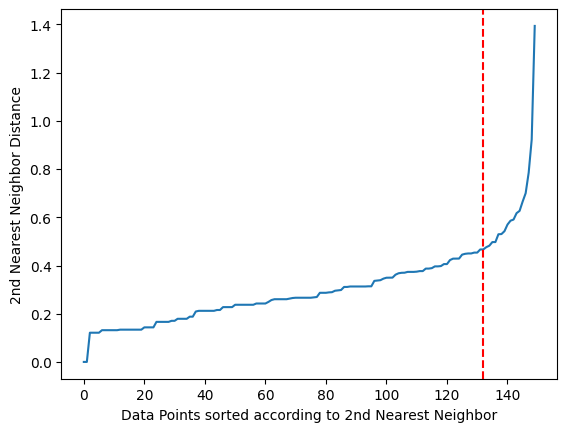

suggested value of eps: 0.46662903814690937


In [6]:
# %pip install kneed

from kneed import KneeLocator

df = sns.load_dataset('iris')

features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=10 )
neighbors_fit = neighbors.fit(scaled_features)

# Get the distances and indices of the points
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort the distances and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# identify the elbow in the plot
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
elbowindex = kneedle.elbow

plt.plot(distances)
plt.xlabel('Data Points sorted according to 2nd Nearest Neighbor')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.axvline(x=elbowindex, color='red', linestyle='--')
plt.show()

print('suggested value of eps:', distances[elbowindex])

## **How to find the best number of MinPts**

The MinPts parameter is the minimum number of points that should be within the ε radius of a point for it to be considered a core point. The optimal value for MinPts depends on the dataset and the desired clustering results.

A common way to find the best number of MinPts is to plot the K-distance graph and look for the "knee" point. The knee point is the point where the distance starts to increase rapidly, and it represents the optimal value for MinPts. The knee point can be found by examining the graph and looking for the point where the distance starts to increase rapidly. This point is the optimal value for MinPts, as it represents the point where the algorithm starts to identify the core points.

## Coding Methods to find the best number of MinPts

1. **Elbow Method**: The elbow method is a common technique used to find the optimal number of clusters in a dataset. It works by plotting the sum of squared distances between the data points and their assigned clusters for different values of k. The optimal number of clusters is the point where the sum of squared distances starts to decrease more slowly, forming an "elbow" shape in the plot.

2. **Silhouette Score**: The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with a score of 1 indicating that the object is well matched to its own cluster and poorly matched to neighboring clusters. The silhouette score can be used to evaluate the quality of a clustering algorithm and find the optimal number of clusters.

3. **Davies-Bouldin Index**: The Davies-Bouldin index is a measure of cluster separation and compactness. It is calculated by taking the average similarity between each cluster and its most similar cluster, and then dividing by the average dissimilarity between each cluster and its most dissimilar cluster. The Davies-Bouldin index ranges from 0 to ∞, with lower values indicating better clustering.

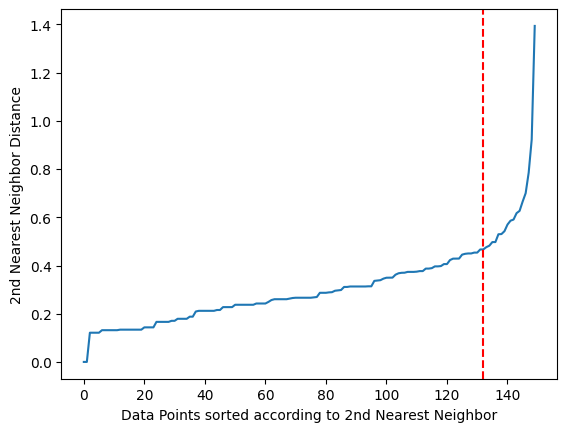

suggested value of MinPts: 132


In [7]:
# find best number of MinPts

from sklearn.cluster import DBSCAN
from kneed import KneeLocator

df = sns.load_dataset('iris')

features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_features)

# Get the distances and indices of the points
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort the distances and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# identify the elbow in the plot
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
elbowindex = kneedle.elbow

plt.plot(distances)
plt.xlabel('Data Points sorted according to 2nd Nearest Neighbor')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.axvline(x=elbowindex, color='red', linestyle='--')
plt.show()

# best number of MinPts
print('suggested value of MinPts:', elbowindex)